<a href="https://colab.research.google.com/github/Deleon57/EDAR-Data/blob/main/SVM(GFI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
from google.colab import files
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Importing the GFI Data from the in build ynfinace library

In [ ]:
stocklist = ['GFI']
stocks = [i + '.JO' for i in stocklist]
start = "2013-03-01"
end = "2024-02-28"

df = yf.download(['GFI.JO'], start=start, end=end)
df.head()

/tmp/ipython-input-4210298163.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['GFI.JO'], start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO
Date,,,,,
2013-03-01,7431.279785,7503.098865,7338.513474,7465.194351,5930842
2013-03-04,7250.466309,7385.140628,7250.466309,7370.176815,4128626
2013-03-05,7257.450195,7283.387474,7217.546689,7262.438134,5666832
2013-03-06,6928.246582,7299.349207,6928.246582,7258.448111,6130247
2013-03-07,7453.976562,7503.855956,7237.499995,7282.391449,10489933


# This code first shows a summary of the dataset (columns, types, and data count) and then shows how many missing values are in each column.

In [ ]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2797 entries, 2013-03-01 to 2024-02-27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, GFI.JO)   2797 non-null   float64
 1   (High, GFI.JO)    2797 non-null   float64
 2   (Low, GFI.JO)     2797 non-null   float64
 3   (Open, GFI.JO)    2797 non-null   float64
 4   (Volume, GFI.JO)  2797 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 131.1 KB


None

,,0
Price,Ticker,
Close,GFI.JO,0
High,GFI.JO,0
Low,GFI.JO,0
Open,GFI.JO,0
Volume,GFI.JO,0


# This code calculates the daily return, creates new columns with past (lagged) values for close, volume, high, and low prices, removes any rows with missing data, and then shows the first few rows.

In [ ]:
df['Daily Return'] = df['Close'].pct_change()

for i in range(1, lag + 1):
    df[f'Close_Lag{i}'] = df['Close'].shift(i)
    df[f'Volume_Lag{i}'] = df['Volume'].shift(i)
    df[f'High_Lag{i}'] = df['High'].shift(i)
    df[f'Low_Lag{i}'] = df['Low'].shift(i)

df.dropna(inplace=True)
display(df.head())

Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-08,7232.509277,7412.075025,7106.813254,7390.128100,6118274,-0.029711,7453.976562,10489933.0,7503.855956,7237.499995,...,7283.387474,7217.546689,7250.466309,4128626.0,7385.140628,7250.466309,7431.279785,5930842.0,7503.098865,7338.513474
2013-03-11,7242.485840,7302.341095,7195.599224,7281.391756,7544183,0.001379,7232.509277,6118274.0,7412.075025,7106.813254,...,7299.349207,6928.246582,7257.450195,5666832.0,7283.387474,7217.546689,7250.466309,4128626.0,7385.140628,7250.466309
2013-03-12,7327.281250,7415.068963,7168.664814,7224.529723,13764762,0.011708,7242.485840,7544183.0,7302.341095,7195.599224,...,7503.855956,7237.499995,6928.246582,6130247.0,7299.349207,6928.246582,7257.450195,5666832.0,7283.387474,7217.546689
2013-03-13,7400.104492,7404.094842,7250.466359,7292.365036,9914850,0.009939,7327.281250,13764762.0,7415.068963,7168.664814,...,7412.075025,7106.813254,7453.976562,10489933.0,7503.855956,7237.499995,6928.246582,6130247.0,7299.349207,6928.246582
2013-03-14,7243.482910,7354.215124,7193.603535,7342.244074,6850472,-0.021165,7400.104492,9914850.0,7404.094842,7250.466359,...,7302.341095,7195.599224,7232.509277,6118274.0,7412.075025,7106.813254,7453.976562,10489933.0,7503.855956,7237.499995


# This code downloads Gold Fields’ stock data from Yahoo Finance for 2013-03-01 to 2024-02-28, calculates daily returns, and then creates five lag columns for close, volume, high, and low prices to use past data as features.

In [ ]:
start = "2013-03-01"
end = "2024-02-28"
df = yf.download(['GFI.JO'], start=start, end=end)

df['Daily Return'] = df['Close'].pct_change()

lag = 5
for i in range(1, lag + 1):
    df[f'Close_Lag{i}'] = df['Close'].shift(i)
    df[f'Volume_Lag{i}'] = df['Volume'].shift(i)
    df[f'High_Lag{i}'] = df['High'].shift(i)
    df[f'Low_Lag{i}'] = df['Low'].shift(i)

df.dropna(inplace=True)
display(df.head())

/tmp/ipython-input-1518364368.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['GFI.JO'], start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-08,7232.509277,7412.075025,7106.813254,7390.128100,6118274,-0.029711,7453.976562,10489933.0,7503.855956,7237.499995,...,7283.387474,7217.546689,7250.466309,4128626.0,7385.140628,7250.466309,7431.279785,5930842.0,7503.098865,7338.513474
2013-03-11,7242.485840,7302.341095,7195.599224,7281.391756,7544183,0.001379,7232.509277,6118274.0,7412.075025,7106.813254,...,7299.349207,6928.246582,7257.450195,5666832.0,7283.387474,7217.546689,7250.466309,4128626.0,7385.140628,7250.466309
2013-03-12,7327.281250,7415.068963,7168.664814,7224.529723,13764762,0.011708,7242.485840,7544183.0,7302.341095,7195.599224,...,7503.855956,7237.499995,6928.246582,6130247.0,7299.349207,6928.246582,7257.450195,5666832.0,7283.387474,7217.546689
2013-03-13,7400.104492,7404.094842,7250.466359,7292.365036,9914850,0.009939,7327.281250,13764762.0,7415.068963,7168.664814,...,7412.075025,7106.813254,7453.976562,10489933.0,7503.855956,7237.499995,6928.246582,6130247.0,7299.349207,6928.246582
2013-03-14,7243.482910,7354.215124,7193.603535,7342.244074,6850472,-0.021165,7400.104492,9914850.0,7404.094842,7250.466359,...,7302.341095,7195.599224,7232.509277,6118274.0,7412.075025,7106.813254,7453.976562,10489933.0,7503.855956,7237.499995


# This code makes a new column called Target that is 1 if the daily return is positive and 0 if it’s negative or zero, then shows the first few rows.

In [ ]:
df['Target'] = (df['Daily Return'] > 0).astype(int)
display(df.head())

Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5,Target
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-08,7232.509277,7412.075025,7106.813254,7390.128100,6118274,-0.029711,7453.976562,10489933.0,7503.855956,7237.499995,...,7217.546689,7250.466309,4128626.0,7385.140628,7250.466309,7431.279785,5930842.0,7503.098865,7338.513474,0
2013-03-11,7242.485840,7302.341095,7195.599224,7281.391756,7544183,0.001379,7232.509277,6118274.0,7412.075025,7106.813254,...,6928.246582,7257.450195,5666832.0,7283.387474,7217.546689,7250.466309,4128626.0,7385.140628,7250.466309,1
2013-03-12,7327.281250,7415.068963,7168.664814,7224.529723,13764762,0.011708,7242.485840,7544183.0,7302.341095,7195.599224,...,7237.499995,6928.246582,6130247.0,7299.349207,6928.246582,7257.450195,5666832.0,7283.387474,7217.546689,1
2013-03-13,7400.104492,7404.094842,7250.466359,7292.365036,9914850,0.009939,7327.281250,13764762.0,7415.068963,7168.664814,...,7106.813254,7453.976562,10489933.0,7503.855956,7237.499995,6928.246582,6130247.0,7299.349207,6928.246582,1
2013-03-14,7243.482910,7354.215124,7193.603535,7342.244074,6850472,-0.021165,7400.104492,9914850.0,7404.094842,7250.466359,...,7195.599224,7232.509277,6118274.0,7412.075025,7106.813254,7453.976562,10489933.0,7503.855956,7237.499995,0


# This code separates the features (X) from the target (y), then splits the data into training (80%) and testing (20%) sets. It then shows the first few rows of each split to check the data.

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-31,3911.957520,4117.587336,3879.016821,4117.587336,1630349,-0.007848,3942.901367,2551587.0,4013.773772,3896.984035,...,4191.454097,4038.729049,4098.621094,3561311.0,4327.209557,4098.621094,4239.367676,1911748.0,4285.285009,4157.515039
2022-08-26,14940.381836,15263.044535,14803.524901,15227.082129,1562121,0.009654,14797.531250,1641538.0,15605.686437,14779.550047,...,15114.201774,14730.602733,14788.541016,1590084.0,14878.447034,14500.841758,14746.583984,2039229.0,15096.218478,14702.629934
2014-02-05,3870.640137,3920.519520,3790.833124,3819.763166,1143849,0.014644,3814.775391,1430287.0,3914.534161,3758.910479,...,3952.442237,3701.050151,3778.862061,2641208.0,3986.360294,3760.905483,3929.498047,3030945.0,3978.379845,3825.748924
2021-01-08,14418.042969,14981.185367,14295.229999,14800.460590,3314452,-0.028852,14846.390625,1949948.0,15243.785438,14674.652163,...,15854.855202,15277.734079,14967.207031,2693895.0,15034.105155,14003.674357,13736.083008,946739.0,14038.622308,13736.083008
2019-11-19,8029.372559,8134.194655,7912.570794,8073.298008,1482017,0.006633,7976.461426,1611879.0,8016.393648,7765.818953,...,8123.213721,7921.555963,7889.610352,2316991.0,7930.540887,7760.828910,7585.126465,2351292.0,7701.928228,7443.367060


Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,24507.230469,25535.610705,24507.230469,25304.749836,2847981,-0.019630,24997.933594,2642161.0,25177.825172,24454.261268,...,25073.888055,23731.696988,25000.933594,2664074.0,25240.789049,24289.362411,24811.046875,4439641.0,25749.481299,24651.143246
2017-10-09,5744.731934,5888.450036,5718.782832,5888.450036,2208544,-0.007586,5788.645020,1070670.0,5888.449244,5733.752696,...,5973.283305,5817.588702,5878.468750,2324688.0,5878.468750,5695.827021,5766.688965,1884611.0,5936.356172,5756.708541
2023-09-21,22923.347656,23502.078723,22389.595688,23106.262657,4941117,-0.034358,23738.970703,1954090.0,23770.955843,22659.472246,...,23648.010271,22889.362831,23551.056641,7785665.0,23941.875041,22013.770964,23650.007812,1055179.0,23938.873552,23289.175522
2013-09-23,4744.526367,4759.490180,4553.987146,4643.770025,2686763,0.023676,4634.791504,8033279.0,4869.224565,4634.791504,...,4711.606135,4614.840140,4667.711426,1792022.0,4723.576320,4572.940623,4643.770508,3612952.0,4778.444840,4588.903187
2013-12-30,3316.979248,3336.931003,3239.167404,3296.029905,823643,0.007881,3291.042236,1066438.0,3332.940925,3192.281042,...,3186.294922,3186.294922,3186.294922,315831.0,3227.196015,3152.376942,3164.348145,1570607.0,3232.184107,3130.430163


,Target
Date,
2018-10-31,0
2022-08-26,1
2014-02-05,1
2021-01-08,0
2019-11-19,1


,Target
Date,
2023-08-10,0
2017-10-09,0
2023-09-21,0
2013-09-23,1
2013-12-30,1


# This code scales the feature values so they’re on the same range, using only the training data to fit the scaler. It then applies the same scaling to the test data and converts both back into DataFrames for easier viewing.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

display(X_train.head())
display(X_test.head())

Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-31,-0.858296,-0.841185,-0.851608,-0.830346,-0.647492,-0.263409,-0.854318,-0.186337,-0.855482,-0.849105,...,-0.830134,-0.828433,-0.831798,0.306802,-0.812177,-0.820051,-0.812344,-0.530859,-0.817467,-0.811222
2022-08-26,0.676869,0.679342,0.700787,0.720263,-0.681738,0.261694,0.658764,-0.645019,0.729797,0.699159,...,0.665502,0.696243,0.664272,-0.664199,0.636443,0.666111,0.660236,-0.465855,0.667867,0.697232
2014-02-05,-0.864047,-0.868070,-0.864139,-0.871914,-0.891687,0.411428,-0.872178,-0.751494,-0.869054,-0.868748,...,-0.862861,-0.876587,-0.876549,-0.146429,-0.858973,-0.868300,-0.855772,0.039835,-0.859633,-0.858680
2021-01-08,0.604159,0.640889,0.628558,0.660718,0.197834,-0.893592,0.665575,-0.489575,0.680305,0.684236,...,0.766918,0.774265,0.689276,-0.120476,0.657814,0.595081,0.518615,-1.022931,0.522562,0.558970
2019-11-19,-0.285149,-0.293216,-0.278432,-0.278227,-0.721946,0.171076,-0.292060,-0.659968,-0.308094,-0.298685,...,-0.291764,-0.274737,-0.301244,-0.306134,-0.317461,-0.296833,-0.343438,-0.306730,-0.348048,-0.341188


Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,GFI.JO,GFI.JO,GFI.JO,GFI.JO,GFI.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,2.008582,2.080784,2.079705,2.126855,-0.036309,-0.616898,2.080651,-0.140686,2.038858,2.075582,...,2.029267,1.979813,2.093510,-0.135165,2.059129,2.064594,2.070765,0.758149,2.131537,2.120344
2017-10-09,-0.603172,-0.599594,-0.590174,-0.583177,-0.357270,-0.255551,-0.597031,-0.932748,-0.599106,-0.587787,...,-0.586150,-0.574765,-0.582706,-0.302343,-0.599198,-0.591859,-0.598291,-0.544697,-0.590623,-0.582461
2023-09-21,1.788104,1.803358,1.778784,1.820001,1.014328,-1.058789,1.905157,-0.487487,1.846458,1.820237,...,1.834023,1.859695,1.890598,2.387666,1.880796,1.739481,1.908046,-0.967636,1.882775,1.925518
2013-09-23,-0.742402,-0.753613,-0.755694,-0.756904,-0.117231,0.682416,-0.757872,2.576540,-0.738493,-0.744137,...,-0.758910,-0.746279,-0.752153,-0.564727,-0.757758,-0.752285,-0.755668,0.336609,-0.749711,-0.749512
2013-12-30,-0.941117,-0.947687,-0.942532,-0.945015,-1.052413,0.208511,-0.945184,-0.934881,-0.948591,-0.949363,...,-0.967769,-0.949992,-0.959479,-1.291880,-0.963202,-0.955241,-0.963008,-0.704812,-0.962154,-0.958144


In [ ]:
svm_model = SVC(kernel='rbf', C=0.5, gamma=0.1, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

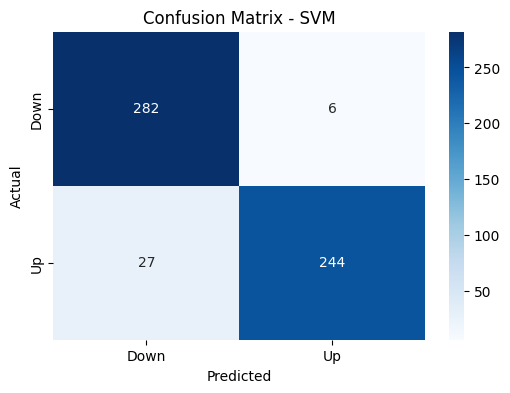

Classification Report:

              precision    recall  f1-score   support

        Down       0.91      0.98      0.94       288
          Up       0.98      0.90      0.94       271

    accuracy                           0.94       559
   macro avg       0.94      0.94      0.94       559
weighted avg       0.94      0.94      0.94       559



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Down", "Up"]))



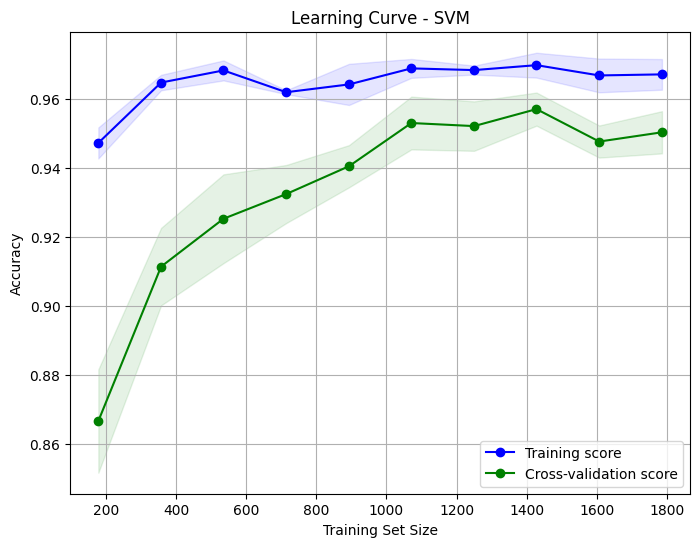

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    estimator=SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="green")

plt.title("Learning Curve - SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


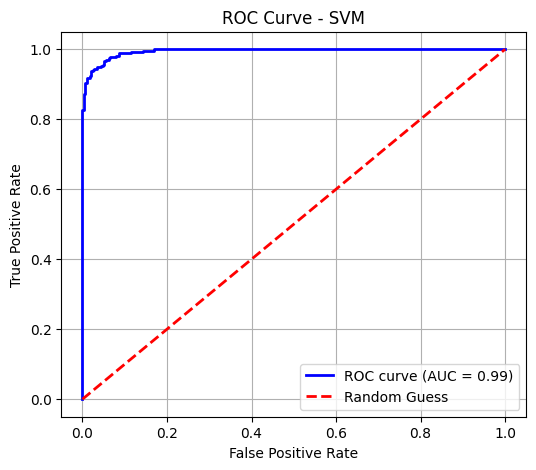

In [ ]:
from sklearn.metrics import roc_curve, auc

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_proba = svm_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


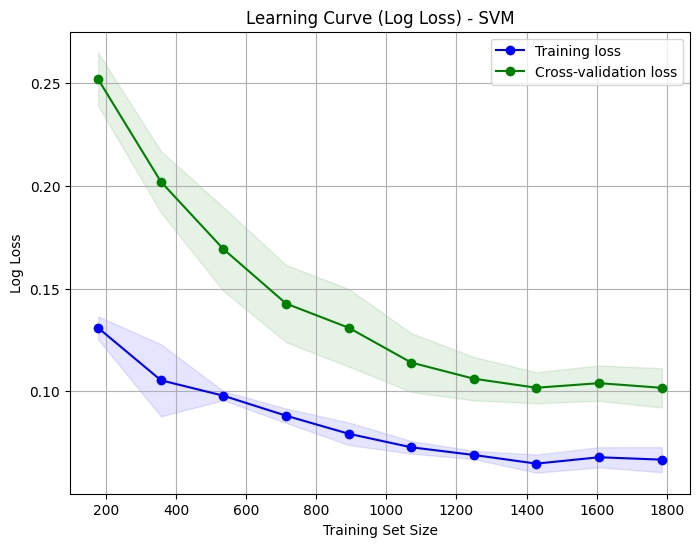

In [ ]:
from sklearn.metrics import log_loss
from sklearn.model_selection import learning_curve
import numpy as np

def log_loss_scorer(estimator, X, y):
    y_proba = estimator.predict_proba(X)
    return -log_loss(y, y_proba)

svm_model_prob = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=svm_model_prob,
    X=X_train,
    y=y_train,
    cv=5,
    scoring=log_loss_scorer,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = -np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training loss")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation loss")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="green")

plt.title("Learning Curve (Log Loss) - SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend(loc="best")
plt.grid(True)
plt.show()
